In [10]:
import numpy as np
import plotnine as pn
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
from scipy.special import softmax

def random_stochastic_matrix(shape: tuple[int], beta: float = 1e-2):
    """Generate a random stochastic matrix using energy-based initialization, where lower `beta` -> more uniform initialization."""
    energies = beta * np.random.randn(*shape)
    return softmax(energies, axis=-1)

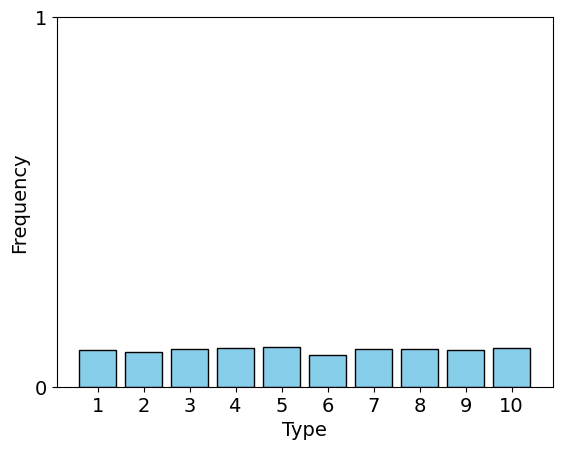

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Define the discrete types (labels)
types = [f"{i+1}" for i in range(10)]

# Generate a random vector of size 1000, choosing among the 10 types
# random_vector = np.random.choice(types, size=100)

p = random_stochastic_matrix((10,), beta=1e-1)
# p = np.array( [0.]*7 + [1.]  + [0.]*2 ) + 1e-3
# p = np.zeros(10)
# p[np.arange(5)] = 1.
# p[np.arange(5,10)] = 10.
# p[np.array((3,5,7,))] = .5
p[3] = 1
p[5] = 2.5
p[7] = 2
# p += 1e-3
# p += random_stochastic_matrix((10,), beta=9e-1)
# p /= p.sum()
random_vector = np.random.choice(a=types, size=100000, p=p)

# Calculate the frequency of each type
unique, counts = np.unique(random_vector, return_counts=True)

# Sort the types numerically
sorted_indices = np.argsort([int(label) for label in unique])
unique_sorted = unique[sorted_indices]
counts_sorted = counts[sorted_indices]
frequencies = counts_sorted / counts_sorted.sum()  # Normalize to get probabilities

plt.rcParams.update({'font.size': 14}) 
# Plot the frequencies as a bar plot
plt.bar(unique_sorted, frequencies, color='skyblue', edgecolor='black')
plt.xlabel("Type")
plt.ylabel("Frequency")
plt.ylim(0, 1)
plt.yticks([0, 1], labels=["0", "1"])
plt.show()
